# Вариант 13

In [34]:
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Нужно создать алгоритм построения интерполяционного многочлена Лагранжа

Построим график заданной функции на участке от 0 до 1:

<Figure size 720x432 with 0 Axes>

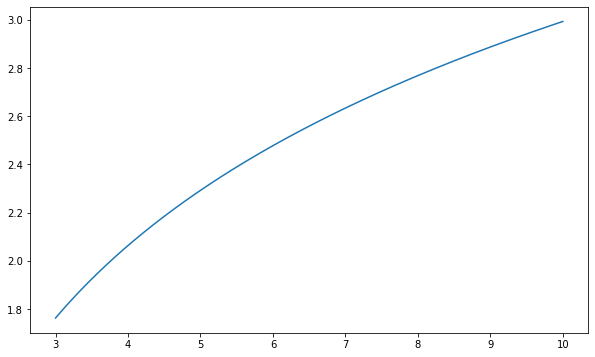

In [35]:
plt.figure(figsize=(10,6))
x = np.linspace(3, 10, 10000)
y = np.log(x+(x*x-1)**0.5)

plt.figure(figsize=(10,6))
plt.plot(x, y);

#### Массив опорных точек:

In [36]:
X = np.array([3, 4, 5, 6, 7, 8, 9, 10])
Y = np.log(X+(X*X-1)**0.5)

In [37]:
print('X:', X)
print('Y:', Y)

X: [ 3  4  5  6  7  8  9 10]
Y: [1.76274717 2.06343707 2.29243167 2.47788873 2.63391579 2.76865938
 2.88727095 2.99322285]


Функция для вычисления многочлена Лагранжа:

In [38]:
def Lagr(A, X, Y):
    result = []
    for i in range(X.shape[0]):
        numer = 1
        denom = 1
        for j, value in enumerate(X):
            if j == i:
                continue
            numer *= (A - value)
            
        for j, value in enumerate(X):
            if j == i:
                continue
            denom *= (X[i] - value)        
        n = (numer / denom) * Y[i]
        result.append(n)
    return np.sum(result)

#### Значения многочлена Лагранжа в заданных точках:

In [39]:
print('Значение в точке 4.25: %.5f' % Lagr(4.25, X, Y))
print('Значение в точке 6: %.5f' % Lagr(6, X, Y))

Значение в точке 4.25: 2.12595
Значение в точке 6: 2.47789


#### Построим график исходной функции и интерполяционного многочлена в одних осях:

In [68]:
Y_Lagr = []

for i in np.linspace(3, 10, 1000):
    Y_Lagr.append(Lagr(i, X, Y))

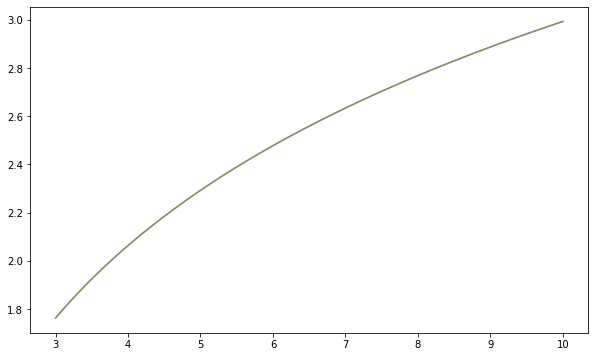

In [69]:
plt.figure(figsize=(10,6))
plt.plot(x, y);
plt.plot(np.linspace(3, 10, 1000), Y_Lagr, color = 'orange', alpha=0.5);

Для лучшей наглядности построим график исходной функции и точки, полученные с помощью многочлена Лагранжа:

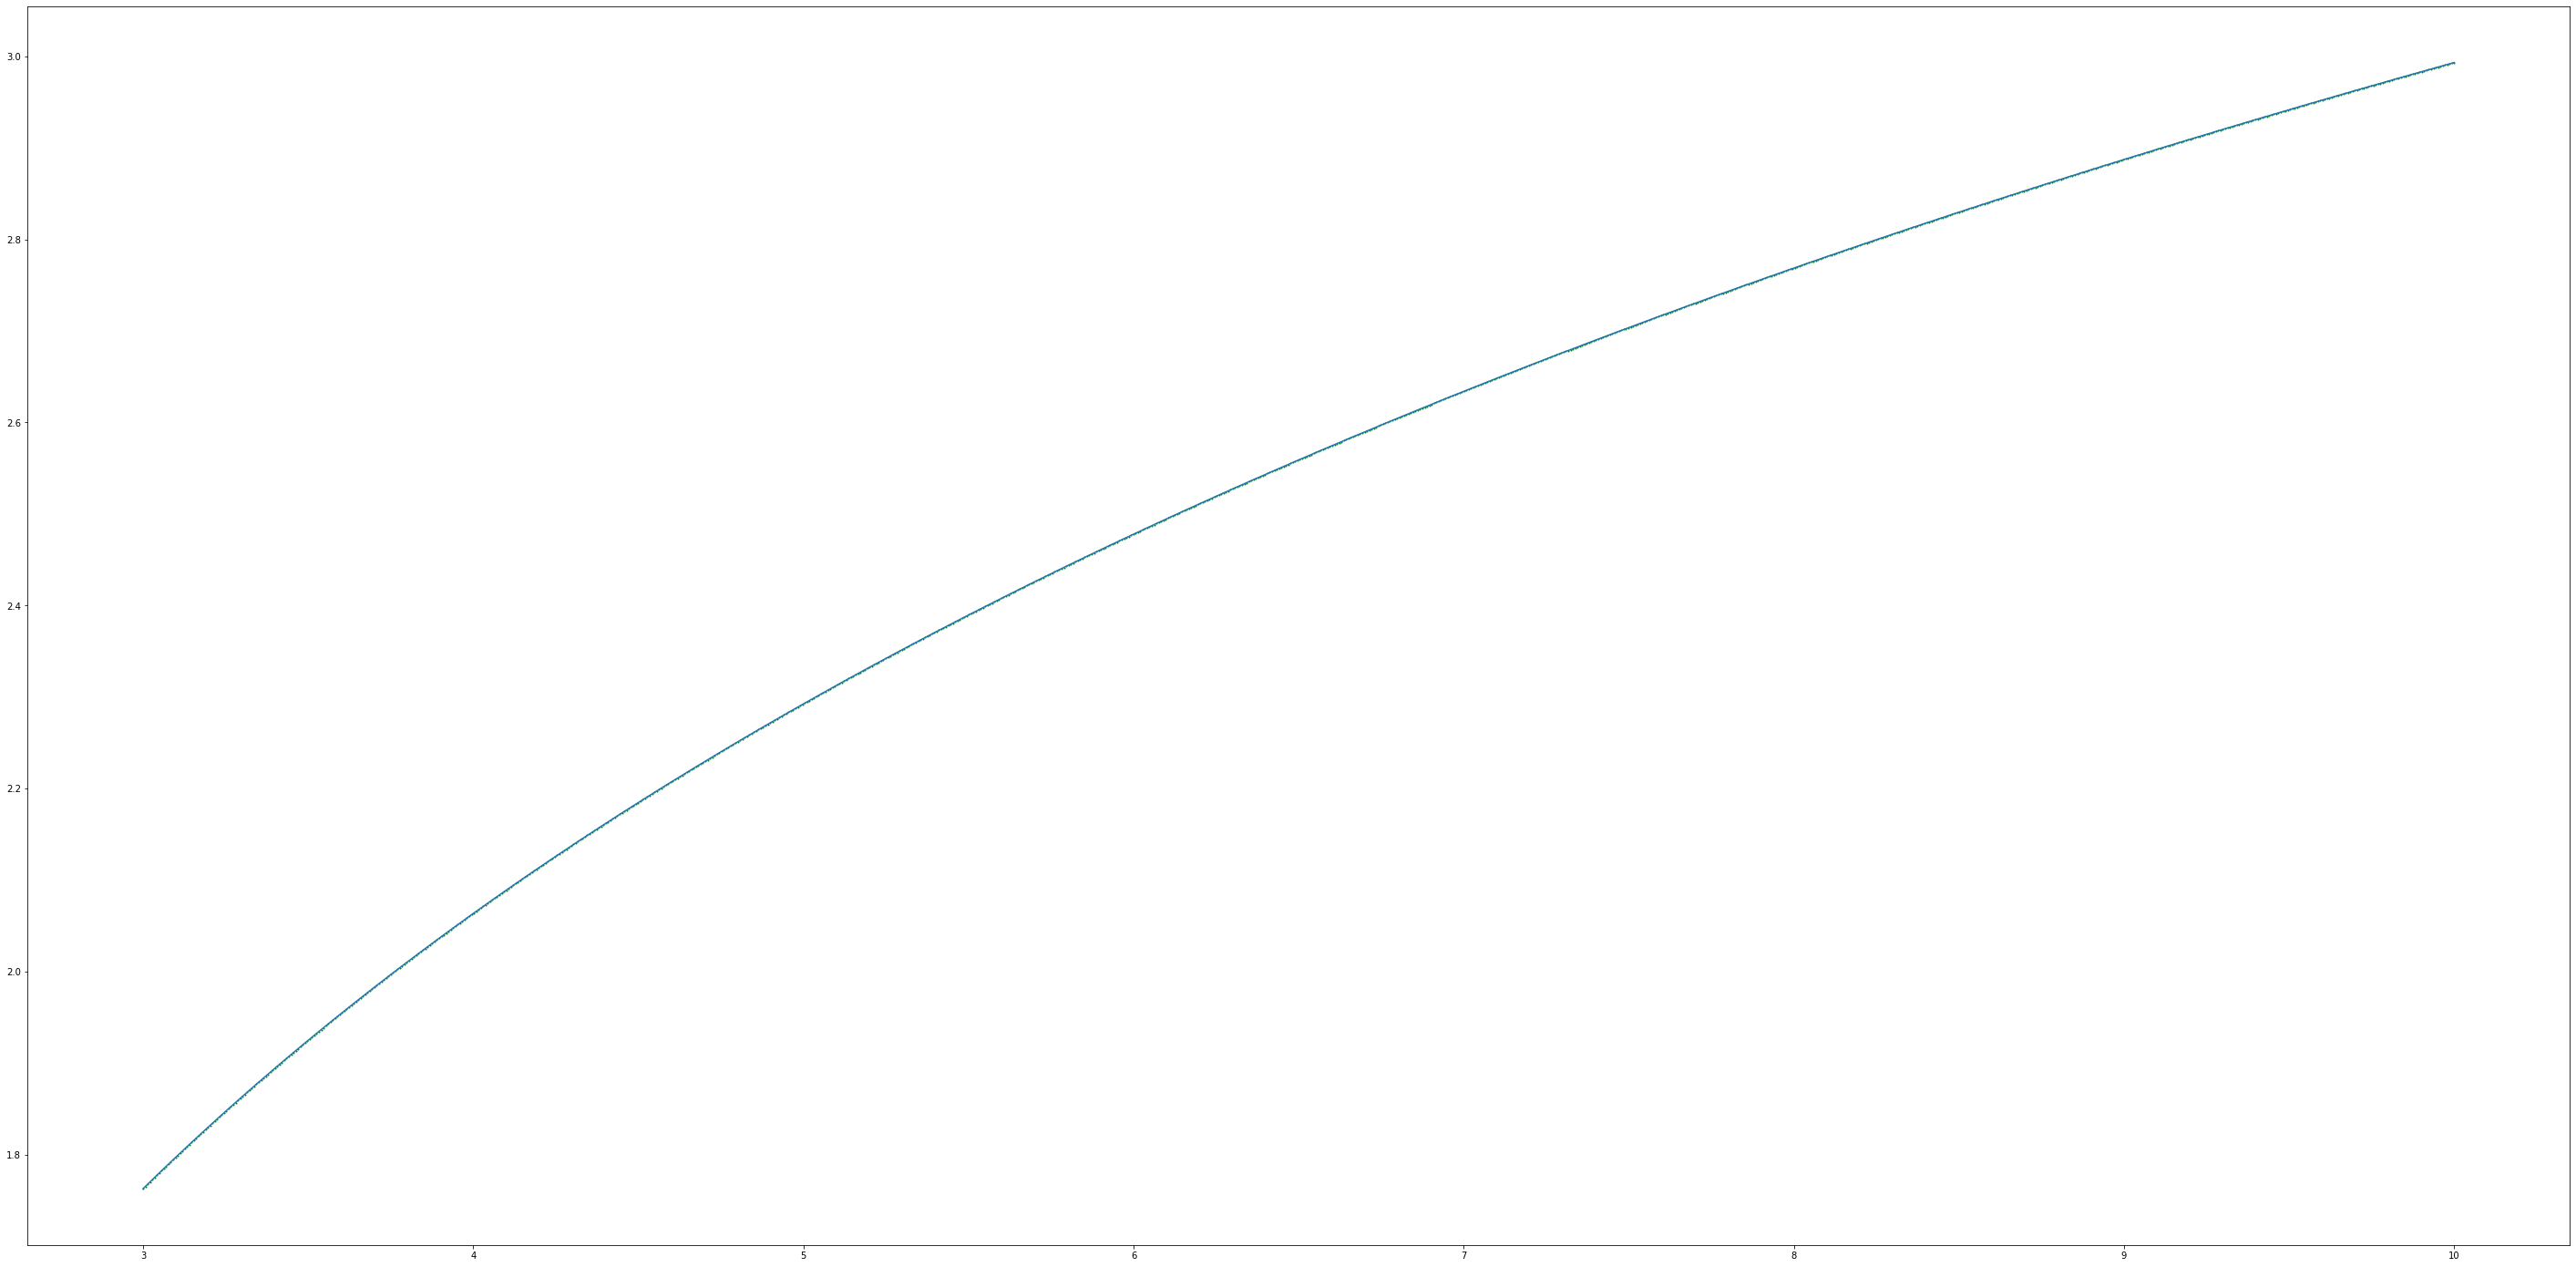

In [78]:
plt.figure(figsize=(50,25))

plt.plot(x, y)
#plt.plot(np.linspace(3, 10, 10000), Y_Lagr, color = 'g', aa=False, alpha=0.5);
plt.scatter(np.linspace(3, 10, 1000), Y_Lagr, color = 'g', marker='o', s=1)

In [77]:
x = np.linspace(3, 10, 1000)
y = np.log(x+(x*x-1)**0.5)

i_list = 0
error = 0
for i in np.linspace(3, 10, 1000):
    error += abs(Y_Lagr[i_list] - np.log(i+(i*i-1)**0.5))
    i_list += 1
    
print(error)

0.01874158971324391
